 # Resale Flat Prices

In [4]:
# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

 # Reading the "csv" files (Registration)

In [6]:
# reading the 2012 to 2014
df_1 = pd.read_csv(r"c:/Users/L/Downloads/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [7]:
# reading the 2015 to 2016
df_2= pd.read_csv(r"c:/Users/L/Downloads/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_2.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0
37152,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0


In [8]:
# reading the 2017 to onwards
df_3=pd.read_csv(r"c:/Users/L/Downloads/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


 # Preprocessing

In [9]:
#df_1 does not have a "remaining_lease" column so, I choose the df_2 and df_3 only

#concatenate the df_2 and df_3

df_4= pd.concat([df_2,df_3],axis= 0)
df_4.reset_index(drop= True, inplace= True)
df_4.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
215062,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,62 years 11 months,998000.0
215063,2024-03,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,62 years 09 months,1200000.0


In [10]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215064 entries, 0 to 215063
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                215064 non-null  object 
 1   town                 215064 non-null  object 
 2   flat_type            215064 non-null  object 
 3   block                215064 non-null  object 
 4   street_name          215064 non-null  object 
 5   storey_range         215064 non-null  object 
 6   floor_area_sqm       215064 non-null  float64
 7   flat_model           215064 non-null  object 
 8   lease_commence_date  215064 non-null  int64  
 9   remaining_lease      215064 non-null  object 
 10  resale_price         215064 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.0+ MB


In [11]:
df_4.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

# This Dataset have not any null values

# Encoding the catogarical columns and chaning the datatype
    

df_4.head(4)

In [12]:
df_4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [13]:
# Creating a new column "address"
df_4["address"]= df_4["block"]+" "+df_4["street_name"]

In [14]:
#droping the "street_name" and "block"
df_5= df_4.drop(columns=["block","street_name"])

In [15]:
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [16]:
# for month
df_5["month"] = pd.to_datetime(df_5["month"], format="%Y-%m")

In [17]:
#spliting the month column to "Year", "month", "day"
df_5["year"]= df_5["month"].dt.year
df_5["month"]= df_5["month"].dt.month

In [18]:
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [19]:
df_5["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [20]:
df_5["town"].nunique()

26

In [21]:
df_5["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [22]:
df_5["flat_type"].nunique()

7

In [23]:
df_5["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [24]:
df_5["flat_model"].nunique()

21

In [25]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_5["town"]= LabelEncoder().fit_transform(df_5["town"])
df_5["flat_model"]= OrdinalEncoder().fit_transform(df_5[["flat_model"]])
df_5["flat_type"]= OrdinalEncoder().fit_transform(df_5[["flat_type"]])

In [26]:
df_5["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [27]:
df_5["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [28]:
df_5["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [29]:
df_5.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
215062,2,25,6.0,04 TO 06,164.0,11.0,1987,62 years 11 months,998000.0,666 YISHUN AVE 4,2024
215063,3,25,6.0,10 TO 12,164.0,11.0,1987,62 years 09 months,1200000.0,666 YISHUN AVE 4,2024


In [30]:
df_5[["storey_start", "storey_end"]]= df_4["storey_range"].str.split(" TO ",expand=True)

In [31]:
#droping the "storey_range" column
df_5.drop(columns=["storey_range"],inplace= True)

In [32]:
df_5.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03


In [33]:
df_5["address"].nunique()

9585

In [34]:
df_5["address"].count()

215064

# Address have 9585 unique values in the 215064 , so i am encoding it for the correlation checking
# I am  choosing the "LabelEncoder" for the "address" column

In [35]:
df_5["address"]= LabelEncoder().fit_transform(df_5["address"])

In [36]:
df_5["storey_start"]= df_5["storey_start"].astype(int)
df_5["storey_end"]= df_5["storey_end"].astype(int)

In [37]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_5["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [38]:
print(df_5["remaining_lease"])

0                         70
1                         65
2                         64
3                         63
4                         64
                 ...        
215059    62 years 08 months
215060    62 years 10 months
215061    62 years 10 months
215062    62 years 11 months
215063    62 years 09 months
Name: remaining_lease, Length: 215064, dtype: object


In [39]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [40]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [41]:
#droping the "remaining_lease" column
df_5.drop(columns=["remaining_lease"],inplace= True)


In [42]:
df_6= pd.concat([df_5,df_data],axis=1)

In [43]:
df_6.columns 

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [44]:
# set the columns
df_7= df_6[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [45]:
df_8=df_7.sort_values(by=["year","month"])

In [46]:
df_8.to_csv("ResaleFlatPrices.csv", index= False)

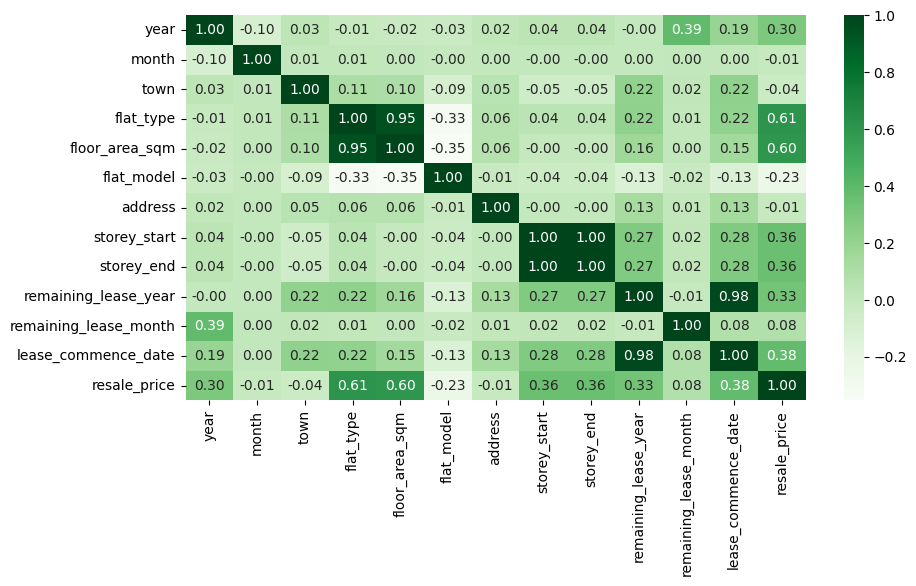

In [86]:
# Checking the Correlation using heatmap

df_8_corr= df_8.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_8_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [47]:
df_final= pd.read_csv("C:/Users/L/Desktop/signapore_resale_project/ResaleFlatPrices.csv")
df_final.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1634,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6592,1,3,65,0,1981,275000.0


In [48]:
# checking the duplicate values
df_final.duplicated().sum()

308

In [49]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)

In [130]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns




In [50]:
df_final_2= df_final_1.drop(columns=["month","address"])

In [51]:
df_final_2.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
214754,2024,25,5.0,146.0,7.0,4,6,62,10,1988,900000.0
214755,2024,25,5.0,142.0,3.0,4,6,62,10,1988,805000.0


In [52]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [ ]:
#for i in df_final_2.columns:
    #plot(df_final_2,i)

In [53]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,214756.0,2019.544320,2.650223,2015.0,2017.0,2020.0,2022.0,2024.0
town,214756.0,13.895770,7.956038,0.0,8.0,14.0,21.0,25.0
flat_type,214756.0,3.121855,0.919275,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,214756.0,97.162959,24.058523,31.0,82.0,94.0,112.0,280.0
flat_model,214756.0,8.694034,3.648788,0.0,5.0,8.0,12.0,20.0
storey_start,214756.0,7.657202,5.845449,1.0,4.0,7.0,10.0,49.0
storey_end,214756.0,9.657202,5.845449,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,214756.0,74.124607,13.448358,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,214756.0,4.587564,3.784193,0.0,1.0,4.0,8.0,11.0
lease_commence_date,214756.0,1995.105310,13.655796,1966.0,1985.0,1995.0,2005.0,2022.0


# skewness handling

# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price

In [54]:
df_final_3= df_final_2.copy()

In [55]:
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])

In [ ]:
#skewed_columns=["storey_start","storey_end","resale_price"]
#for i in skewed_columns:
    #plot(df_final_3,i)

 # Outliers Handling - Interquartile Range(IQR) Method

In [ ]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers

In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [56]:
df_final_4= df_final_3.copy()

In [57]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [ ]:
#outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
#for j in outlier_columns:
    #outlier(df_final_4,j)

In [ ]:
#for k in outlier_columns:
    #plot(df_final_4,k)

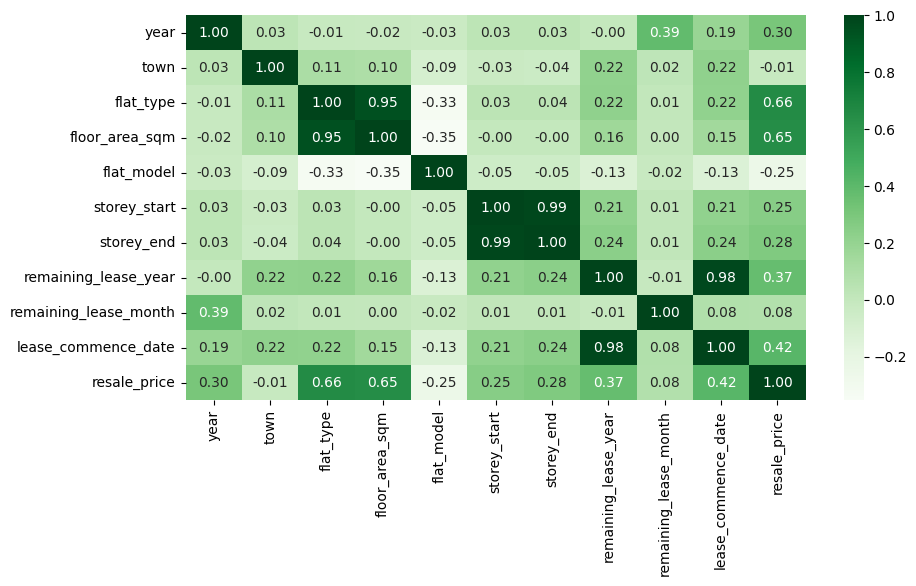

In [99]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

In [ ]:
# Model Selection (Regression)

In [58]:
df_final_5= df_final_4.copy()

In [59]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,214756.0,2019.544320,2.650223,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,214756.0,13.895770,7.956038,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,214756.0,3.121855,0.919275,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,214756.0,97.162959,24.058523,31.000000,82.000000,94.000000,112.000000,280.000000
flat_model,214756.0,8.694034,3.648788,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,214756.0,1.693375,0.924957,0.000000,1.386294,1.945910,2.302585,3.891820
storey_end,214756.0,2.094084,0.603438,1.098612,1.791759,2.197225,2.484907,3.931826
remaining_lease_year,214756.0,74.124607,13.448358,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,214756.0,4.587564,3.784193,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,214756.0,1995.105310,13.655796,1966.000000,1985.000000,1995.000000,2005.000000,2022.000000


In [60]:
np.exp(14.265878)

1568888.5551970045

In [61]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1568888]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
208217,2024,1,23,4.0,117.0,4.0,1081,40,42,87,4,2012,1568888.0


In [62]:
np.exp(11.849398)

140000.04177720455

In [63]:
df_final_1[df_final_1["resale_price"] <= 140000]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
104489,2020,2,23,2.0,67.0,5.0,3004,10,12,49,11,1971,140000.0


In [64]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [65]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)


    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)


    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__, 
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }
    

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae}
    
    print(metrics_train)
    print(metrics_test)
    print("")



In [109]:
select_model(df_final_5, LinearRegression)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6751648103996299, 'Mean_squared_error': 0.03561520453544063, 'Root_mean_squared_error': 0.18871991027827623, 'Mean_absolute_error': 0.14782436202969979}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.675104609232521, 'Mean_squared_error': 0.035704505134629375, 'Root_mean_squared_error': 0.1889563577512791, 'Mean_absolute_error': 0.14798510477704724}



In [110]:
select_model(df_final_5, DecisionTreeRegressor)

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9962339280535496, 'Mean_squared_error': 0.00041291530893875736, 'Root_mean_squared_error': 0.020320317638726944, 'Mean_absolute_error': 0.007252395413522166}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9253331363251411, 'Mean_squared_error': 0.008205543978842203, 'Root_mean_squared_error': 0.09058445771125531, 'Mean_absolute_error': 0.06434020466620641}



In [66]:
select_model(df_final_5, RandomForestRegressor)


{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9911634191516742, 'Mean_squared_error': 0.0009688501873650587, 'Root_mean_squared_error': 0.031126358401924546, 'Mean_absolute_error': 0.022188663233103433}
{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9550176222135812, 'Mean_squared_error': 0.004943355874791286, 'Root_mean_squared_error': 0.07030900280043294, 'Mean_absolute_error': 0.05145132196585946}



In [112]:
select_model(df_final_5, AdaBoostRegressor)

{'Data': 'Train Data', 'Name': 'AdaBoostRegressor', 'R2_score': 0.6653530364704279, 'Mean_squared_error': 0.03669097571581658, 'Root_mean_squared_error': 0.19154888596861266, 'Mean_absolute_error': 0.15886683996504827}
{'Data': 'Test Data', 'Name': 'AdaBoostRegressor', 'R2_score': 0.6662748893131818, 'Mean_squared_error': 0.036674850633999716, 'Root_mean_squared_error': 0.1915067900467232, 'Mean_absolute_error': 0.15874928638536892}



In [113]:
select_model(df_final_5, ExtraTreesRegressor)

{'Data': 'Train Data', 'Name': 'ExtraTreesRegressor', 'R2_score': 0.9962339280535496, 'Mean_squared_error': 0.0004129153089387575, 'Root_mean_squared_error': 0.020320317638726947, 'Mean_absolute_error': 0.007252395413628919}
{'Data': 'Test Data', 'Name': 'ExtraTreesRegressor', 'R2_score': 0.9469422697362214, 'Mean_squared_error': 0.005830799871182685, 'Root_mean_squared_error': 0.07635967437844851, 'Mean_absolute_error': 0.05568572410586902}



In [114]:
select_model(df_final_5, GradientBoostingRegressor)

{'Data': 'Train Data', 'Name': 'GradientBoostingRegressor', 'R2_score': 0.8641383816454808, 'Mean_squared_error': 0.014895982581705679, 'Root_mean_squared_error': 0.1220490990614256, 'Mean_absolute_error': 0.09222814519798662}
{'Data': 'Test Data', 'Name': 'GradientBoostingRegressor', 'R2_score': 0.8641581334055324, 'Mean_squared_error': 0.014928394680708093, 'Root_mean_squared_error': 0.1221818099420208, 'Mean_absolute_error': 0.09230406405749558}



In [115]:
select_model(df_final_5, XGBRegressor) 

{'Data': 'Train Data', 'Name': 'XGBRegressor', 'R2_score': 0.9552455334500862, 'Mean_squared_error': 0.0049069175110328, 'Root_mean_squared_error': 0.07004939336662952, 'Mean_absolute_error': 0.05348833682978767}
{'Data': 'Test Data', 'Name': 'XGBRegressor', 'R2_score': 0.9525634564427403, 'Mean_squared_error': 0.005213057375201098, 'Root_mean_squared_error': 0.07220150535273553, 'Mean_absolute_error': 0.055087265740692726}



In [ ]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i am selecting the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)


test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test) 




In [117]:
df_final_5.iloc[10456]

year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
storey_start                0.000000
storey_end                  1.098612
remaining_lease_year       68.000000
remaining_lease_month       0.000000
lease_commence_date      1985.000000
resale_price               12.815838
Name: 10456, dtype: float64

In [125]:
df_final_5.dtypes

year                       int64
town                       int64
flat_type                float64
floor_area_sqm           float64
flat_model               float64
storey_start             float64
storey_end               float64
remaining_lease_year       int64
remaining_lease_month      int64
lease_commence_date        int64
resale_price             float64
dtype: object

In [71]:
np.isfinite(df_final_5).sum()

year                     214756
town                     214756
flat_type                214756
floor_area_sqm           214756
flat_model               214756
storey_start             214756
storey_end               214756
remaining_lease_year     214756
remaining_lease_month    214756
lease_commence_date      214756
resale_price             214756
dtype: int64

In [127]:
df_final_5.head(1)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,0,2.0,60.0,5.0,1.94591,2.197225,70,0,1986,12.449019


In [118]:
user_data = np.array([[2015,4,2,74,8,0,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

12.808504569445104

In [119]:
np.exp(12.792003979535888)

359332.7000997733

In [164]:
import pickle
import numpy as np

In [120]:
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [121]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)     

In [122]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]     

12.273202704163293

In [123]:
np.exp(12.273202704163293) 

213886.9116653966